In [1]:
#Imports and data imports
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#Using UCI Machine Learning Repository's database.
#Using data from the "Iris Data Set" (https://archive.ics.uci.edu/ml/datasets/Iris)
#Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

#Reading CSV Data into Pandas
col_names = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "class"
]
total_dataframe = pd.read_csv(
    "./iris.data",
    names=col_names,
    sep=",")

raw_training, raw_testing = train_test_split(total_dataframe, test_size=0.2)


setlist = []
def massage_data(df):
    
    
    one_hot = pd.get_dummies(df['class'])
    df = df.drop('class',axis=1)
    df = df.join(one_hot)
    
    #separating into features and labels
    features = df[df.columns[:4]]
    labels = df[df.columns[4:]]

    
    #Feature normalization
    min_max_scaler = preprocessing.MinMaxScaler()
    features = min_max_scaler.fit_transform(features)
    
    return features, labels

training_features, training_labels = massage_data(raw_training)
testing_features, testing_labels = massage_data(raw_testing)


In [3]:
#Revisiting this, I note that this approach results in Overfitting.
def build_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(4,)),
        layers.Dense(4, activation='elu'),
        layers.Dense(3, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(lr=0.01)
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    
    model.compile(loss=loss,
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

model = build_model()
model.fit(training_features,training_labels,epochs=100)
testing_loss, testing_accuracy = model.evaluate(testing_features,testing_labels,verbose=2)


model.predict(testing_features)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7749 - accuracy: 0.2417
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7715 - accuracy: 0.3000
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7678 - accuracy: 0.3083
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7639 - accuracy: 0.3167
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7599 - accuracy: 0.3250
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7545 - accuracy: 0.3750
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7488 - accuracy: 0.4917
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7427 - accuracy: 0.6333
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7383 - accuracy: 0.6583
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7326 - accuracy: 0.6667
Epoch 11/100
4/4 [===========

array([[5.58735838e-13, 3.53864743e-05, 9.99964595e-01],
       [9.81445611e-01, 1.85541380e-02, 2.59149772e-07],
       [9.47287500e-01, 5.27112521e-02, 1.27723831e-06],
       [1.09949021e-03, 9.64780271e-01, 3.41202654e-02],
       [8.36843174e-05, 8.01179051e-01, 1.98737293e-01],
       [9.91333425e-01, 8.66645109e-03, 1.10162631e-07],
       [9.89417374e-01, 1.05825532e-02, 1.18656992e-07],
       [9.82587755e-01, 1.74119584e-02, 3.43750997e-07],
       [9.81647968e-01, 1.83518175e-02, 1.79005923e-07],
       [9.95676577e-01, 4.32345225e-03, 2.40373126e-08],
       [1.77900403e-12, 1.04438855e-04, 9.99895573e-01],
       [2.55706206e-10, 1.15483045e-03, 9.98845100e-01],
       [5.40925030e-05, 3.57903630e-01, 6.42042279e-01],
       [6.70216014e-06, 2.86675483e-01, 7.13317871e-01],
       [9.61441636e-01, 3.85577641e-02, 5.75310310e-07],
       [1.03563536e-03, 9.84695137e-01, 1.42691946e-02],
       [2.06606739e-04, 8.19932818e-01, 1.79860562e-01],
       [2.91522667e-10, 6.40056

Epoch 1/100
3/3 [==============================] - 0s 38ms/step - loss: 0.7629 - accuracy: 0.2917 - val_loss: 0.7576 - val_accuracy: 0.3750
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 0.7587 - accuracy: 0.3333 - val_loss: 0.7547 - val_accuracy: 0.3750
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 0.7583 - accuracy: 0.3438 - val_loss: 0.7517 - val_accuracy: 0.3750
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7538 - accuracy: 0.3750 - val_loss: 0.7484 - val_accuracy: 0.4167
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7476 - accuracy: 0.4271 - val_loss: 0.7444 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7441 - accuracy: 0.4479 - val_loss: 0.7403 - val_accuracy: 0.6250
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.7379 - accuracy: 0.5208 - val_loss: 0.7359 - val_accuracy: 0.6250
Epoch 8/100
3/3 [===

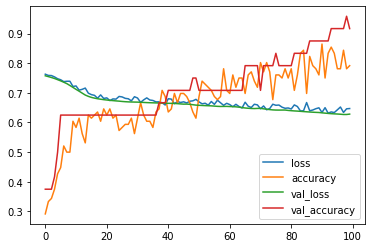

In [19]:
#Trying to fix overfitting + more layers + statistical analysis
import matplotlib.pyplot as plt

def build_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(4,)),
        layers.Dropout(0.2),
        layers.Dense(8, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(8, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(3, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(lr=0.01)
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    
    model.compile(loss=loss,
                optimizer=optimizer,
                metrics=['accuracy'])
    return model


cb = tf.keras.callbacks.ModelCheckpoint(
    filepath="./checkpoints/{epoch:03d}.ckpt",
)
model = build_model()
history = model.fit(
    training_features,
    training_labels,
    validation_split=0.2,
    epochs=100)

testing_loss, testing_accuracy = model.evaluate(testing_features,testing_labels,verbose=2)

epochStats = pd.DataFrame(history.history)
epochStats.save_as("history_csv")
epochStats.plot()